In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



In [ ]:
df = pd.read_csv('Churn_Modelling.csv')

In [ ]:
# Understanding the dataset
df.head()

df.tail()


In [4]:
#Finding the infob of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
 14  Point Earned     10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+ MB


In [5]:
#checking the null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Point Earned       0
dtype: int64

In [6]:
#checking the statis information of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1000.000000


In [10]:
# 1. Histogram
# Ensure no infinite values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Set plot style
sns.set(style="whitegrid")

# Function to plot histograms
def plot_histogram(attribute, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    
    unique_hues = df[hue].unique()
    bins = 20  # Adjust the number of bins as needed
    
    for unique_hue in unique_hues:
        attribute_data = df[df[hue] == unique_hue][attribute]
        plt.hist(attribute_data, bins=bins, alpha=0.5, label=unique_hue)

    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()
    
# Function to plot count plots
def plot_countplot(attribute, hue, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=attribute, hue=hue, palette="coolwarm")
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

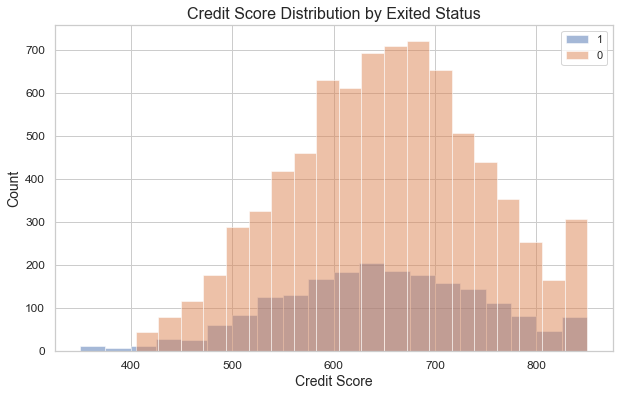

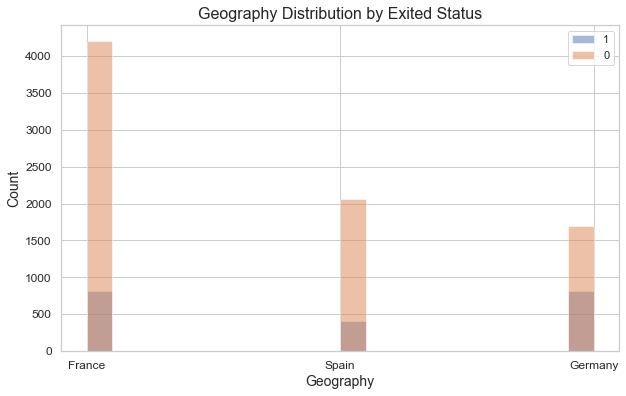

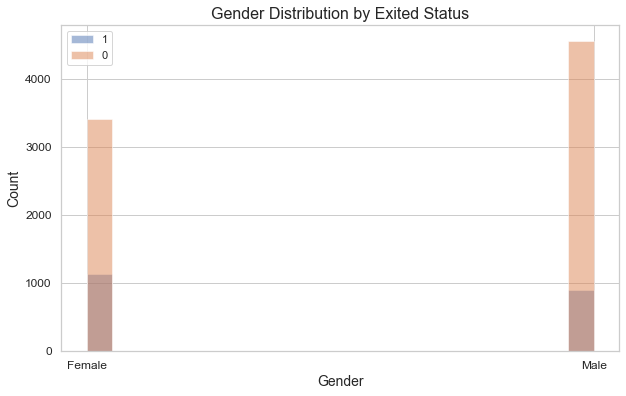

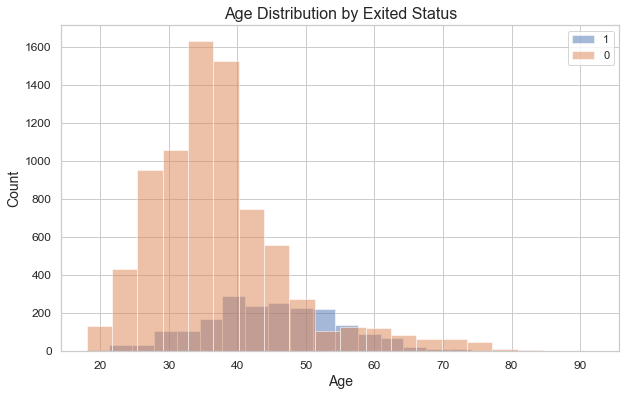

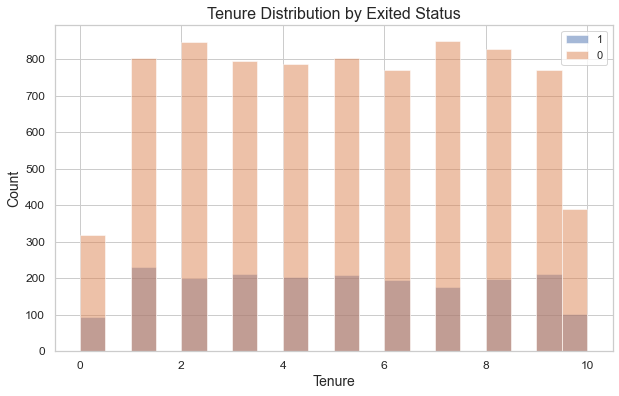

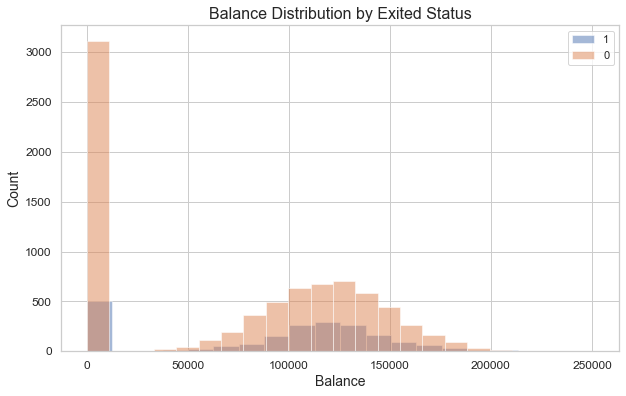

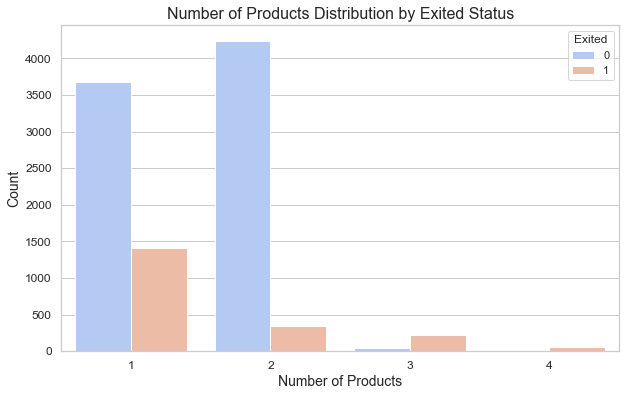

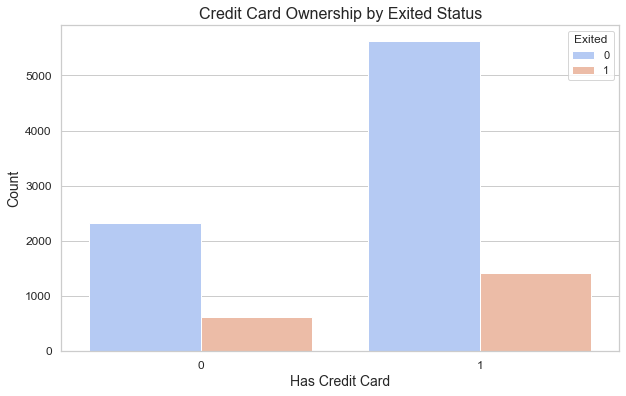

In [18]:
# CreditScore vs Exited
plot_histogram('CreditScore', 'Exited', 'Credit Score Distribution by Exited Status', 'Credit Score', 'Count')

# Geography vs Exited
plot_histogram('Geography', 'Exited', 'Geography Distribution by Exited Status', 'Geography', 'Count')

# Gender vs Exited
plot_histogram('Gender', 'Exited', 'Gender Distribution by Exited Status', 'Gender', 'Count')

# Age vs Exited
plot_histogram('Age', 'Exited', 'Age Distribution by Exited Status', 'Age', 'Count')

# Tenure vs Exited
plot_histogram('Tenure', 'Exited', 'Tenure Distribution by Exited Status', 'Tenure', 'Count')

# Balance vs Exited
plot_histogram('Balance', 'Exited', 'Balance Distribution by Exited Status', 'Balance', 'Count')

# NumOfProducts vs Exited
plot_countplot('NumOfProducts', 'Exited', 'Number of Products Distribution by Exited Status', 'Number of Products', 'Count')

# HasCrCard vs Exited
plot_countplot('HasCrCard', 'Exited', 'Credit Card Ownership by Exited Status', 'Has Credit Card', 'Count')

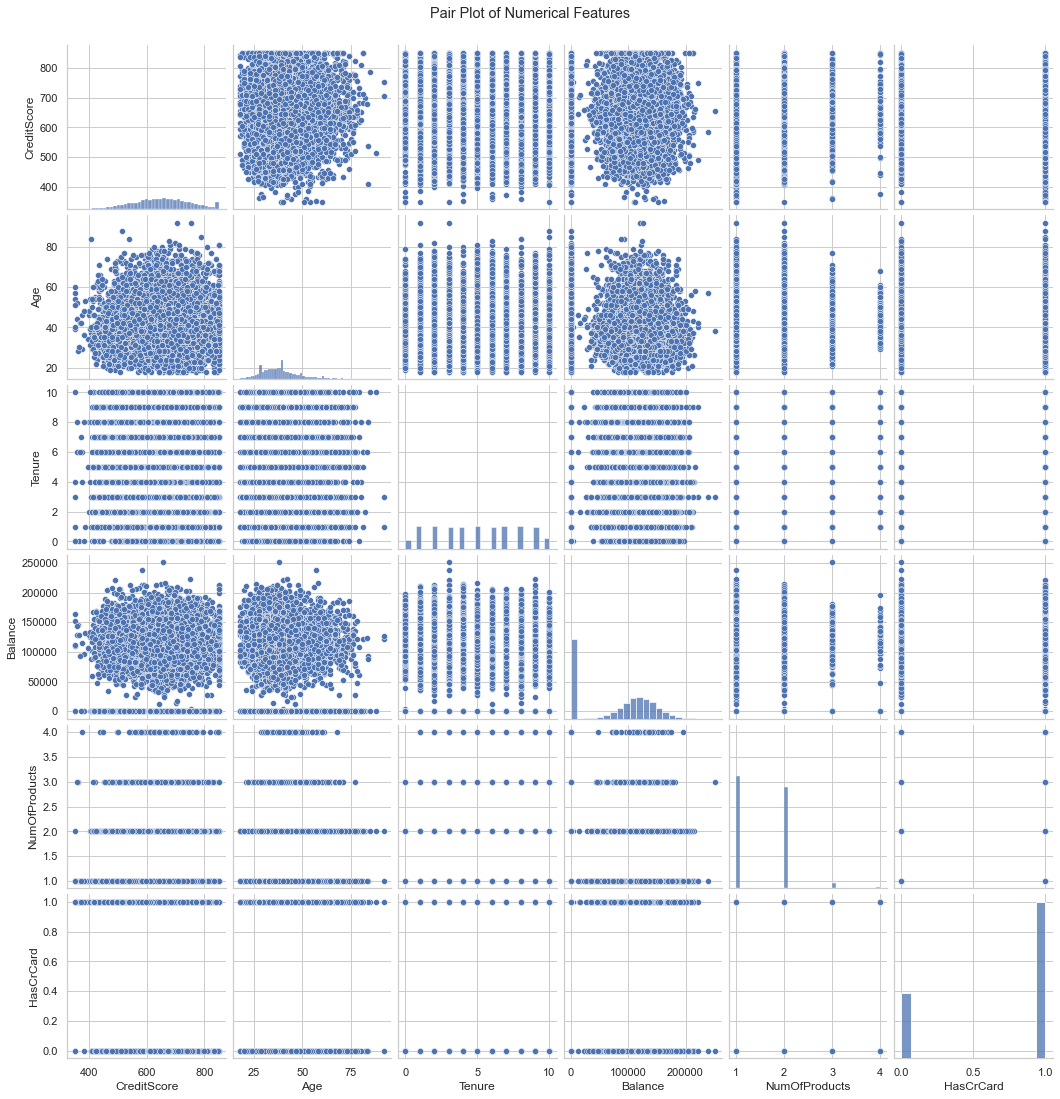

In [19]:
#scatter
sns.pairplot(df[['CreditScore', 'Geography','Gender','Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard']])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

<AxesSubplot:>

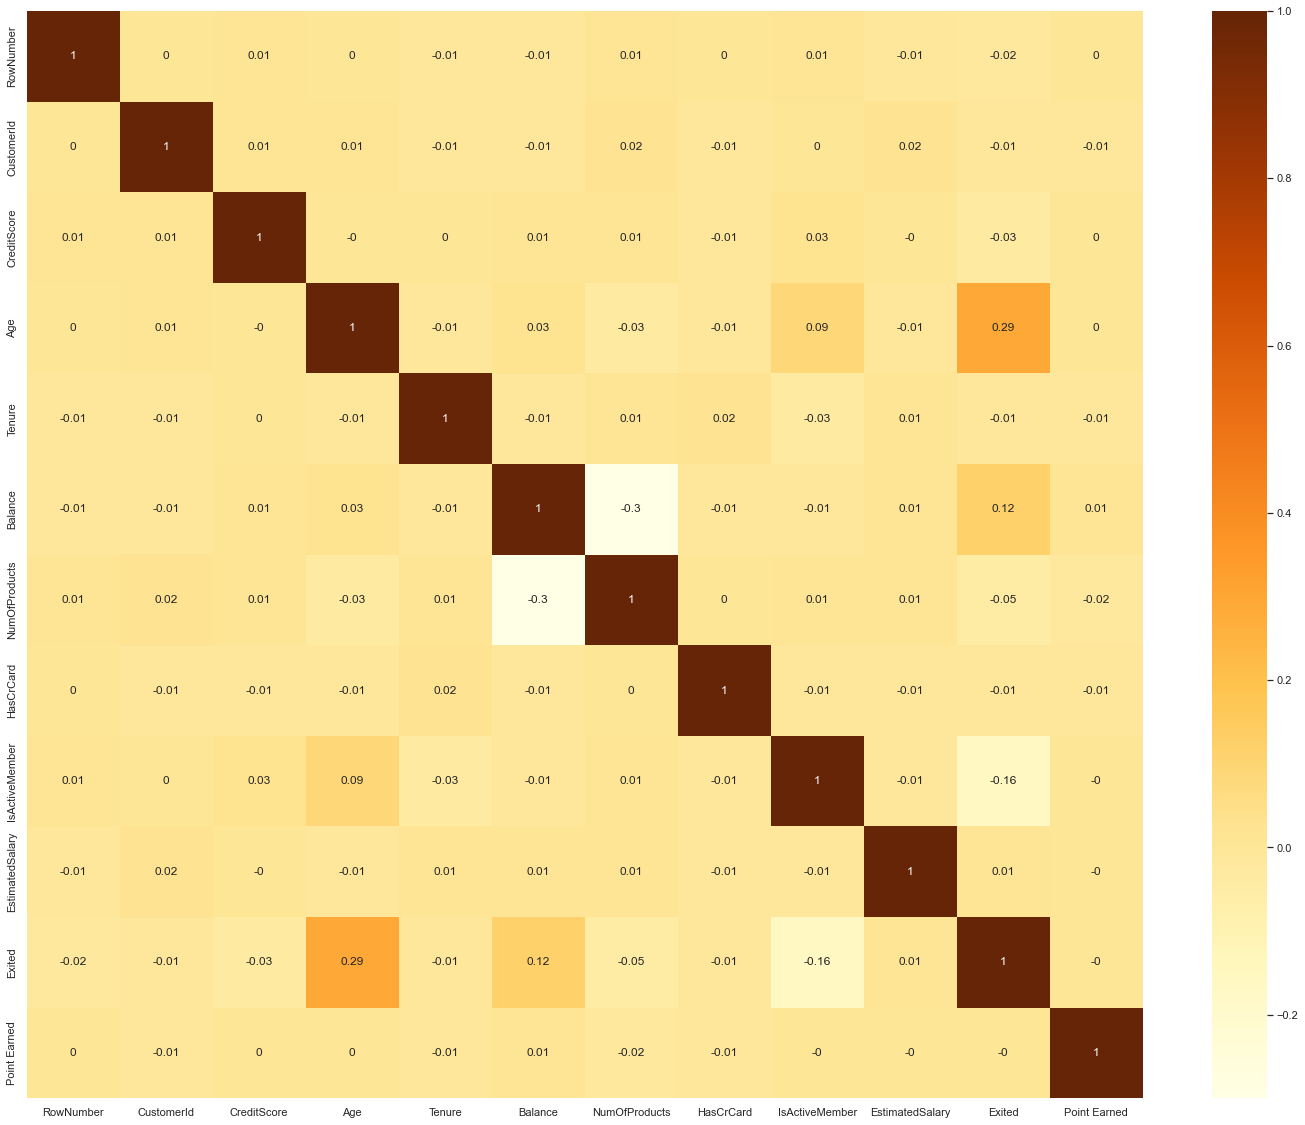

In [20]:
#heatmap
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

# Model Training

## Random Forest

In [21]:
# Understanding the dataset
df.head()

df.tail()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,911


In [22]:
#checking the null value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
Point Earned       0
dtype: int64

In [23]:
#checking the statis information of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1000.000000


In [24]:
#Droping the values in the column
df=df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,425


In [25]:
#Encoding the Categorical value
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [26]:
#Creating the dummies 
df=pd.get_dummies(df,drop_first= True)
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Point Earned,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,464,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,456,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,377,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,350,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,425,0,1,0


In [27]:
#Checking the Imbalanced Values
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

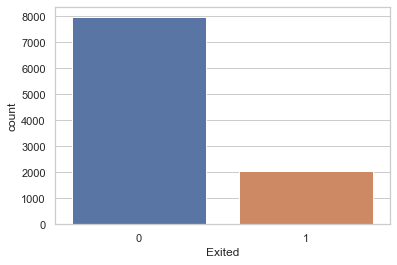

In [28]:
#visualizaing the tagret value
sns.countplot(df['Exited'])

In [34]:
# Separate features and target
X = df.drop(columns='Exited')
X = X.values
y = df['Exited']

In [86]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(
    n_estimators=10,          # Number of trees in the forest
    max_depth=None,            # Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
    min_samples_split=2,       # The minimum number of samples required to split an internal node
    min_samples_leaf=1,        # The minimum number of samples required to be at a leaf node
    max_features='sqrt',       # The number of features to consider when looking for the best split
    bootstrap=True,            # Whether bootstrap samples are used when building trees
    random_state=42            # Seed for the random number generator
)

In [37]:
# Train the model on the training data
clf.fit(X_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=10, random_state=42)

In [38]:
# Make predictions on the testing data
y_pred_rf = clf.predict(X_test)

In [39]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_rf)

In [40]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 86.07%
Precision: 85.02%
Recall: 86.07%
F1 Score: 84.50%
Confusion Matrix:
[[2333   83]
 [ 335  249]]


## LogisticRegression

In [89]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [92]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [93]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.93      0.03      0.06      2416
           1       0.20      0.99      0.33       584

    accuracy                           0.22      3000
   macro avg       0.56      0.51      0.20      3000
weighted avg       0.79      0.22      0.12      3000

Accuracy: 0.21933333333333332


In [94]:
# Train the model on the training data

log.fit(x_train,y_train)

LogisticRegression()

In [96]:
# Make predictions on the testing data

y_pred_lr= log.predict(X_test)

In [97]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr, average='weighted')
recall = recall_score(y_test, y_pred_lr, average='weighted')
f1 = f1_score(y_test, y_pred_lr, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_lr)

In [98]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 21.93%
Precision: 78.78%
Recall: 21.93%
F1 Score: 11.58%
Confusion Matrix:
[[  80 2336]
 [   6  578]]


In [84]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_pred_log_reg = log_reg.predict(x_test)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_log_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1633
           1       0.77      0.78      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186

Accuracy: 0.778405524168236


In [69]:
#Handling the imbalanced data
from imblearn.over_sampling import SMOTE

In [70]:
x_res,y_res = SMOTE().fit_resample(x,y)

In [71]:
y_res.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [72]:
#spliting the Dataset into the training set and the test set'
x_train,x_test,y_train,y_test= train_test_split(x_res,y_res,test_size=0.20,random_state=42)

In [74]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [76]:
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [78]:
y_pred_lr1 = log.predict(x_test)

In [79]:
accuracy_score(y_test,y_pred_lr1)

0.778405524168236

## Decision Tree

In [53]:
# Explore the first few rows of the dataset
print(df.head())

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Point Earned  Geography_Germany  \
0               1        101348.88       1           464                  0   
1               1        112542.58       0           456                  0   
2               0        113931.57       1           377                  0   
3               0         93826.63       0           350                  0   
4               1         79084.10       0           425                  0   

   Geography_Spain  Gender_Male  
0                0            0  
1                1            0  
2             

In [54]:
# Split the dataset into features and the target variable
#X = df[['CreditScore', 'Geography_Germany','Geography_Spain', 'Gender_Male', 'Age', 'Tenure','Balance']]
X = df[['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Point Earned','Geography_Germany','Geography_Spain',  'Gender_Male']]
y = df['Exited']

In [55]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Create a decision tree classifier object using 'entropy' as the criterion for Information Gain
clf = DecisionTreeClassifier(criterion='entropy')

In [57]:
# Train the classifier using the training set
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
# Predict the response for the test dataset
y_pred_dt = clf.predict(X_test)

In [59]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt, average='weighted')
recall = recall_score(y_test, y_pred_dt, average='weighted')
f1 = f1_score(y_test, y_pred_dt, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_dt)

In [60]:
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 80.80%
Precision: 81.28%
Recall: 80.80%
F1 Score: 81.03%
Confusion Matrix:
[[2109  307]
 [ 269  315]]


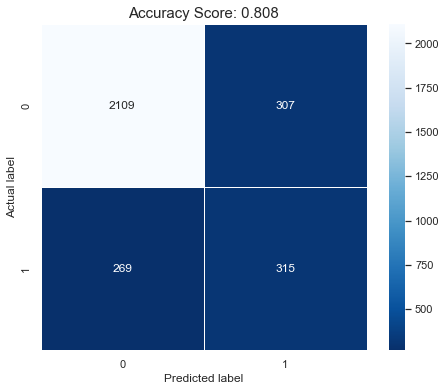

In [62]:
# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15)
plt.show()

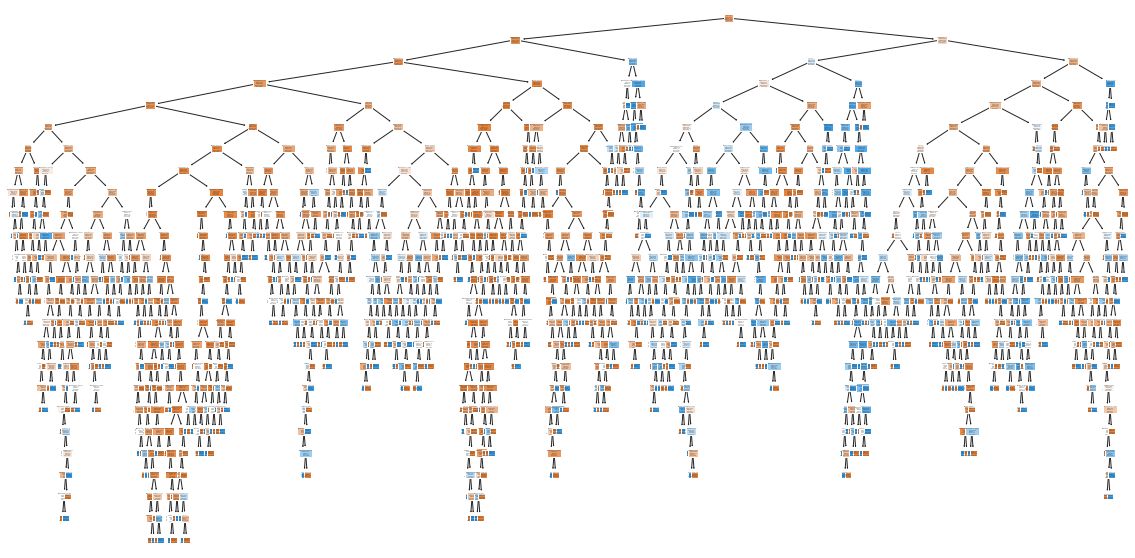

In [65]:
#  Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=['CreditScore','Age','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Point Earned','Geography_Germany','Geography_Spain',  'Gender_Male'], class_names=['Class1', 'Class2', 'Class3'])
plt.show()

In [111]:
Final_data = pd.DataFrame({'Model' : ['RF','LR', 'DT'],'Accuracy':[accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_log_reg),accuracy_score(y_test,y_pred_dt)]})

In [112]:
Final_data

,Model,Accuracy
0,RF,0.860667
1,LR,0.219333
2,DT,0.808000


C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

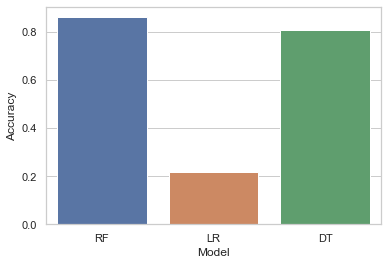

In [113]:
sns.barplot(Final_data['Model'],Final_data['Accuracy'])

In [107]:
Final_data = pd.DataFrame({'Model' : ['RF','LR', 'DT'],'Precision':[precision_score(y_test,y_pred_rf),precision_score(y_test,y_pred_log_reg),precision_score(y_test,y_pred_dt)]})

In [108]:
Final_data

,Model,Precision
0,RF,0.750000
1,LR,0.198353
2,DT,0.506431


C:\Users\Pavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Model', ylabel='Precision'>

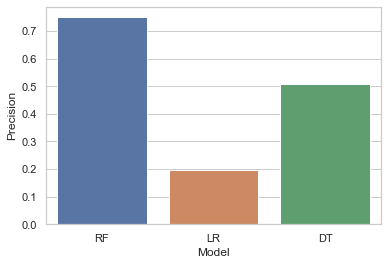

In [109]:
sns.barplot(Final_data['Model'],Final_data['Precision'])